In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read Excel file and display the first few rows
data = pd.read_csv('NASA.csv', skiprows=11) 
print(data.head())

   YEAR  MO  DY  HR    T2M  WS50M  ALLSKY_SFC_SW_DWN
0  2022   1   1   0  14.92   3.58                0.0
1  2022   1   1   1  14.87   3.34                0.0
2  2022   1   1   2  14.80   3.23                0.0
3  2022   1   1   3  14.81   3.23                0.0
4  2022   1   1   4  14.77   3.39                0.0


In [3]:
# Extract solar irradiance data
wind_data = data['WS50M']

# Display the first few rows of extracted data
print("wind data:")
print(wind_data.head())


wind data:
0    3.58
1    3.34
2    3.23
3    3.23
4    3.39
Name: WS50M, dtype: float64


/tmp/ipykernel_1167707/2098879788.py:49: RuntimeWarning: divide by zero encountered in divide
  Nwt = wind_speed / pwg


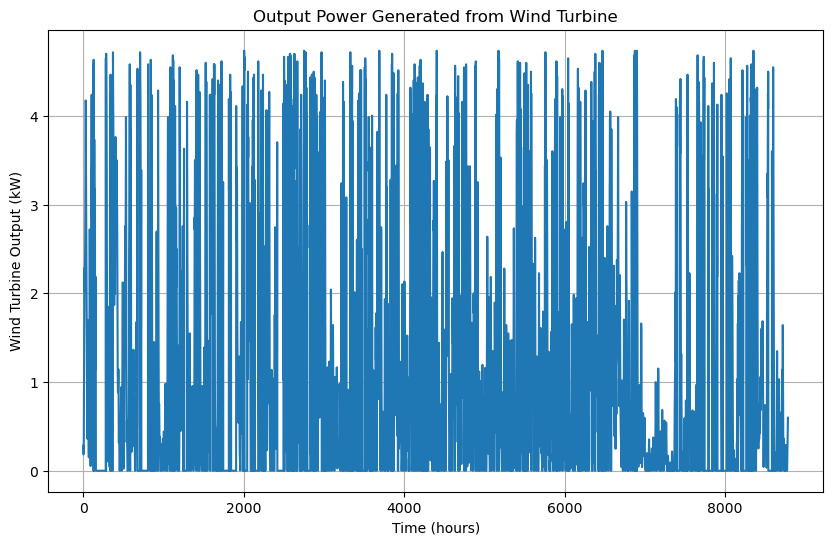

In [4]:
wind_speed = wind_data.values.flatten()

# Load wind turbine data
wind_turbine_data = {
    "Blades Diameter (m)": [6.4],
    "Area Swept by Blade (m^2)": [np.pi * (6.4 / 2) ** 2],
    "Efficiency": [0.95],
    "Cut-Out Speed (m/s)": [40],
    "Cut-In Speed (m/s)": [2.5],
    "Rated Speed (m/s)": [9.5],
    "Rated Power (kW)": [5],
    "Output Power at Cut-Out Speed (kW)": [4],
    "Maximum Output Power (kW)": [None]  # Please provide this value
}

# Create DataFrame from wind turbine data
wind_turbine_df = pd.DataFrame(wind_turbine_data)

# Define wind turbine parameters
bd = wind_turbine_df.iloc[0]['Blades Diameter (m)']
as_ = wind_turbine_df.iloc[0]['Area Swept by Blade (m^2)']
eff = wind_turbine_df.iloc[0]['Efficiency']
vcut = wind_turbine_df.iloc[0]['Cut-Out Speed (m/s)']
vin = wind_turbine_df.iloc[0]['Cut-In Speed (m/s)']
vr = wind_turbine_df.iloc[0]['Rated Speed (m/s)']
pr = wind_turbine_df.iloc[0]['Rated Power (kW)']
pcut = wind_turbine_df.iloc[0]['Output Power at Cut-Out Speed (kW)']
pmax = wind_turbine_df.iloc[0]['Maximum Output Power (kW)']  # Please provide this value

# Calculate wind speed at hub height
h1 = 43.6  # Wind turbine at hub height
h2 = 70  # Wind turbine at hub height
alfa = 0.25  # For heavily forested landscape (power law exponential)
V2 = wind_speed * (h2 / h1) ** alfa

# Wind turbine model
pwt = []
pwg = []
for V in V2:
    if V < vin:
        pwt.append(0)
    elif vin <= V <= vr:
        pwt.append((V ** 3 * (pr / (vr ** 3 - vin ** 3))) - pr * ((vin ** 3) / ((vr ** 3) - (vin ** 3))))
    elif vr < V < vcut:
        pwt.append(0)
    pwg.append(pwt[-1] * eff)

# Normalize wind turbine output to wind speed
Nwt = wind_speed / pwg

# Plot wind turbine output power
plt.figure(figsize=(10, 6))
plt.plot(pwg)
plt.xlabel('Time (hours)')
plt.ylabel('Wind Turbine Output (kW)')
plt.title('Output Power Generated from Wind Turbine')
plt.grid(True)
plt.show()
